Task :
load numpy array files

train the model

plot and evaluate model


In [1]:
import numpy

In [2]:
train_d = numpy.load('data/train_data_new.npy')

In [3]:
train_l =numpy.load('data/train_label.npy')

In [4]:
test_d = numpy.load('data/test_data.npy')

In [5]:
test_l = numpy.load('data/test_label.npy')

In [13]:
'''
   plot_history is plotting the results using matplotlib the two output graphs plots model accuracy and model loss

'''

import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['acc'], marker='.')
    plt.plot(history.history['val_acc'], marker='.')
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()
    plt.savefig('model_accuracy.png')
    plt.close()

    plt.plot(history.history['loss'], marker='.')
    plt.plot(history.history['val_loss'], marker='.')
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.grid()
    plt.legend(['loss', 'val_loss'], loc='upper right')
    plt.show()
    plt.savefig('model_loss.png')
    plt.close()

In [14]:
'''
    This function is used to save the results in a text format file
'''
def save_history(history):
    loss = history.history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    nb_epoch = len(acc)

    with open('result.txt', 'w') as fp:
        fp.write('epoch\tloss\tacc\tval_loss\tval_acc\n')
        for i in range(nb_epoch):
            fp.write('{}\t{}\t{}\t{}\t{}\n'.format(
                i, loss[i], acc[i], val_loss[i], val_acc[i]))


/home/sgg_goel/anaconda3/envs/fastai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/sgg_goel/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(128, kernel_size=(3, 3, 3), input_shape=(3, 16, 11..., padding="same")`
/home/sgg_goel/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(64, kernel_size=(3, 3, 3), padding="same")`
/home/sgg_goel/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(pool_size=(3, 3, 3), padding="same")`
/hom

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 3, 16, 112, 128)   387200    
_________________________________________________________________
activation_1 (Activation)    (None, 3, 16, 112, 128)   0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 3, 16, 112, 64)    221248    
_________________________________________________________________
activation_2 (Activation)    (None, 3, 16, 112, 64)    0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 1, 6, 38, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 6, 38, 64)      0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 1, 6, 38, 64)      110656    
__________

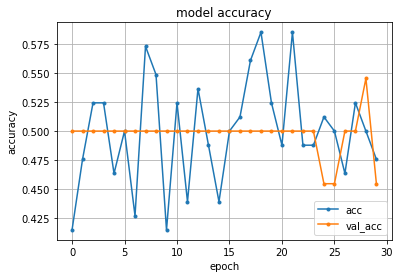

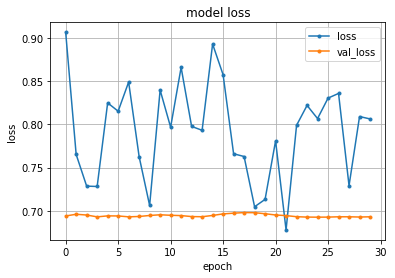

In [8]:
'''
  Defining model using Keras CNN for 3d
'''

from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.layers.advanced_activations import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
# Define model
model = Sequential()
model.add(Conv3D(128, kernel_size=(3, 3, 3), input_shape=(
train_d.shape[1:]), border_mode='same'))
model.add(Activation('relu'))
model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), border_mode='same'))
model.add(Dropout(0.5))

model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
model.add(Activation('relu'))
model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), border_mode='same'))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
model.summary()


history = model.fit(train_d, train_l, validation_data=(test_d, test_l), batch_size=130,epochs=30, verbose=1, shuffle=True)
plot_history(history)
save_history(history)




In [9]:
history = model.fit(train_d, train_l, validation_data=(test_d, test_l), batch_size=130,epochs=30, verbose=1, shuffle=True)

Train on 82 samples, validate on 22 samples
Epoch 1/30
82/82 [==============================] - 94s 1s/step - loss: 0.7826 - acc: 0.4878 - val_loss: 0.6941 - val_acc: 0.5000
Epoch 2/30
82/82 [==============================] - 94s 1s/step - loss: 0.6919 - acc: 0.5732 - val_loss: 0.6950 - val_acc: 0.5000
Epoch 3/30
82/82 [==============================] - 94s 1s/step - loss: 0.8427 - acc: 0.4756 - val_loss: 0.6944 - val_acc: 0.4545
Epoch 4/30
82/82 [==============================] - 94s 1s/step - loss: 0.7642 - acc: 0.5488 - val_loss: 0.6946 - val_acc: 0.6364
Epoch 5/30
82/82 [==============================] - 94s 1s/step - loss: 0.8064 - acc: 0.5000 - val_loss: 0.6950 - val_acc: 0.5000
Epoch 6/30
82/82 [==============================] - 94s 1s/step - loss: 0.7953 - acc: 0.4634 - val_loss: 0.6961 - val_acc: 0.5000
Epoch 7/30
82/82 [==============================] - 94s 1s/step - loss: 0.8209 - acc: 0.4146 - val_loss: 0.6972 - val_acc: 0.5000
Epoch 8/30
82/82 [============================

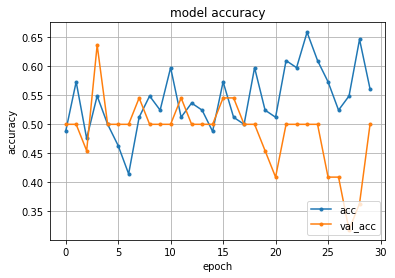

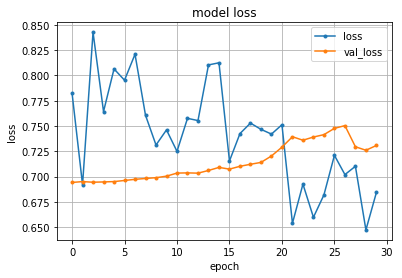

In [10]:
plot_history(history)
save_history(history)